In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
len(df)

48895

In [6]:
df['neighbourhood_group'].unique()
#Total 5 boroughs.

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [7]:
no_host_name_df = df[df['host_name'].isna()]

In [8]:
no_host_name_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0


In [9]:
no_name_df = df[df['name'].isna()]

In [10]:
no_name_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0


In [11]:
no_name_df['neighbourhood_group'].value_counts()

Manhattan    9
Brooklyn     6
Bronx        1
Name: neighbourhood_group, dtype: int64

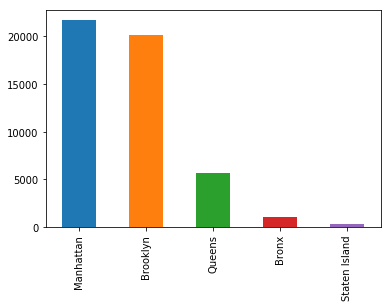

In [12]:
df['neighbourhood_group'].value_counts().plot.bar()
#Manhattan and Brooklyn are the major boroughs.

In [13]:
cols = ['longitude', 'latitude', 'id', 'host_id', 'reviews_per_month']

In [14]:
df_copy = df.copy()

In [15]:
feature_cols = [w for w in list(df.columns) if w not in cols]

In [16]:
feature_cols

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'calculated_host_listings_count',
 'availability_365']

In [17]:
df_copy = df_copy[feature_cols]

In [18]:
df_copy.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,1,0


In [19]:
high_price_df = df_copy[df_copy['price'] == max(df['price'])]


In [20]:
high_price_df

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,Private room,10000,100,2,2016-02-13,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,2017-07-27,1,0
29238,1-BR Lincoln Center,Jelena,Manhattan,Upper West Side,Entire home/apt,10000,30,0,NaN,1,83


C:\Users\manoj praveen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


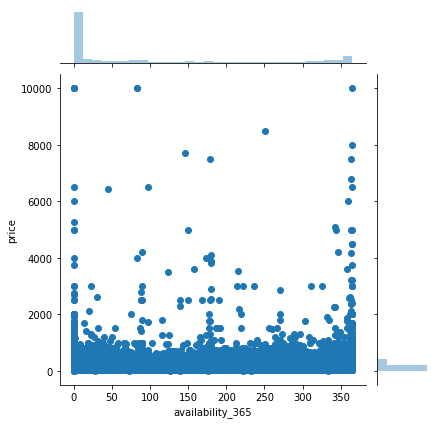

In [21]:
sns.jointplot('availability_365','price' ,  df_copy)
#not much to infer here.

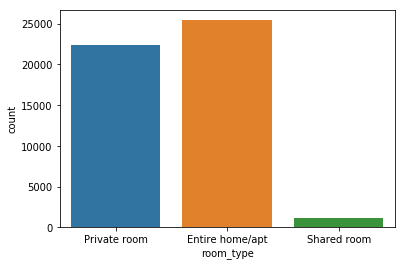

In [22]:
sns.countplot(df_copy['room_type'])

In [23]:
room_type_counts = df_copy['room_type'].value_counts()

In [24]:
df_copy['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [26]:
#sns.boxplot(x = 'price', data = df_copy_pr, hue = 'room_type')

In [27]:
len(df_copy[df_copy['price'] == 0])
#11 houses have price as 0.

11

In [28]:
df_copy_pr = df_copy[df_copy['price']!= 0]

In [29]:
df_copy_pr.describe()
#The std is still high for price.

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,152.755053,7.029887,23.271991,7.144628,112.779498
std,240.170260,20.512224,44.551331,32.956185,131.627271
min,10.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [30]:
max_nightsstay_df = df_copy_pr[df_copy_pr['minimum_nights'] == 1250]

In [31]:
max_nightsstay_df

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
5767,Prime W. Village location 1 bdrm,Genevieve,Manhattan,Greenwich Village,Entire home/apt,180,1250,2,2014-11-09,1,365


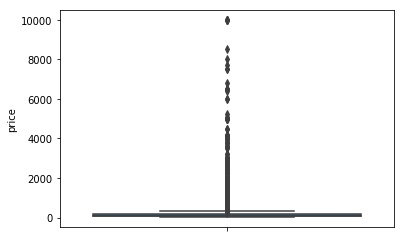

In [32]:
sns.boxplot(y = 'price', data = df_copy_pr)

In [33]:
df_normalprice_df = df_copy_pr[df_copy_pr['price'] >50]

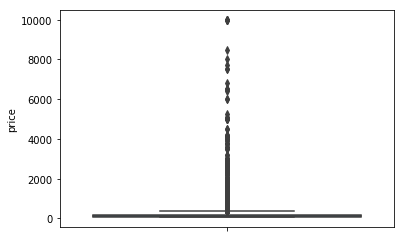

In [34]:
sns.boxplot(y = df_normalprice_df['price'])

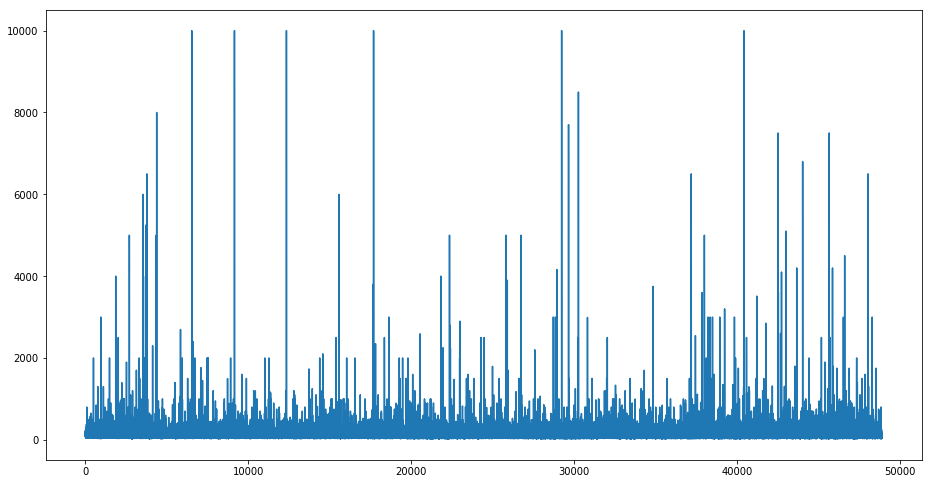

In [35]:
plt.plot(df_copy_pr['price'])
plt.gcf().set_size_inches(15.7, 8.27)

C:\Users\manoj praveen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


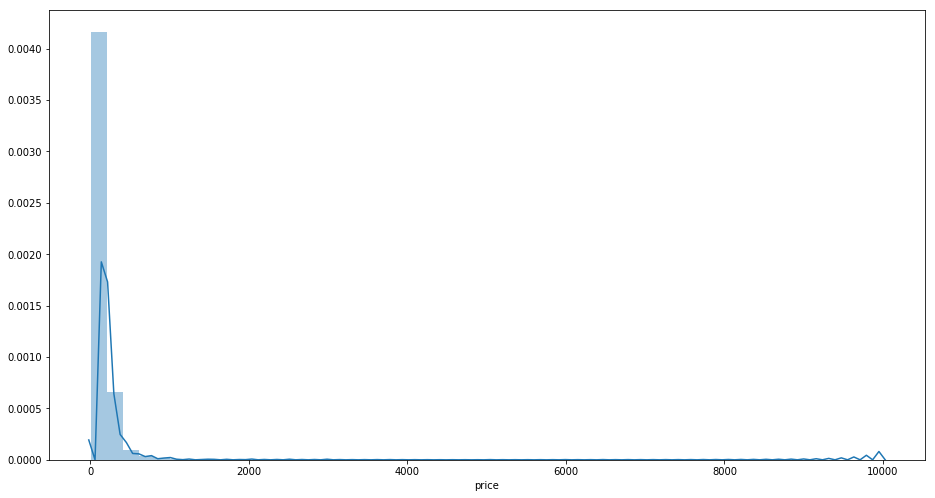

In [36]:
sns.distplot(df_copy_pr['price'])
plt.gcf().set_size_inches(15.7, 8.27)

In [37]:
len(df_copy_pr[df_copy_pr['price']>50])

42334

In [38]:
len(df_copy_pr[df_copy_pr['price'] < 1000])

48586

In [39]:
len(df_copy_pr[df_copy_pr['price'] > 1000])

239

In [40]:
df_basic_price = df_copy_pr[df_copy_pr['price'] < 800]

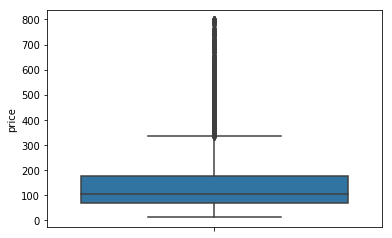

In [41]:
sns.boxplot(y = df_basic_price['price'])

In [42]:
df_basic_price.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48410.000000,48410.000000,48410.000000,48410.000000,48410.000000
mean,137.575170,6.979508,23.412663,7.179860,112.094195
std,103.780081,20.293249,44.700109,33.094503,131.258152
min,10.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,105.000000,3.000000,5.000000,1.000000,44.000000
75%,175.000000,5.000000,24.000000,2.000000,224.000000
max,799.000000,1250.000000,629.000000,327.000000,365.000000


In [43]:
df_basic_price['room_type'].value_counts()

Entire home/apt    25022
Private room       22237
Shared room         1151
Name: room_type, dtype: int64

In [44]:
df_basic_price.room_type.replace(['Entire home/apt', 'Private room', 'Shared room'], [0.5, 1, 0], inplace = True)

C:\Users\manoj praveen\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [45]:
df_basic_price.describe()

,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48410.000000,48410.000000,48410.000000,48410.000000,48410.000000,48410.000000
mean,0.717786,137.575170,6.979508,23.412663,7.179860,112.094195
std,0.270835,103.780081,20.293249,44.700109,33.094503,131.258152
min,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000
25%,0.500000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,0.500000,105.000000,3.000000,5.000000,1.000000,44.000000
75%,1.000000,175.000000,5.000000,24.000000,2.000000,224.000000
max,1.000000,799.000000,1250.000000,629.000000,327.000000,365.000000


In [46]:
df_basic_price.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [47]:
len(df_basic_price[df_basic_price['number_of_reviews']<200])

47764

In [48]:
df_reviews = df_basic_price[(df_basic_price['number_of_reviews']>0) & (df_basic_price['number_of_reviews']<200)]

In [49]:
df_reviews.describe()

,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,37937.000000,37937.000000,37937.000000,37937.000000,37937.000000,37937.000000
mean,0.716741,133.349738,5.902971,25.400480,5.234178,113.042017
std,0.268976,98.378410,17.389843,36.666685,26.600396,129.185077
min,0.000000,10.000000,1.000000,1.000000,1.000000,0.000000
25%,0.500000,68.000000,1.000000,3.000000,1.000000,0.000000
50%,0.500000,100.000000,2.000000,9.000000,1.000000,52.000000
75%,1.000000,169.000000,4.000000,31.000000,2.000000,223.000000
max,1.000000,799.000000,1250.000000,199.000000,327.000000,365.000000


In [50]:
len(df_reviews[df_reviews['minimum_nights'] <200])

37899

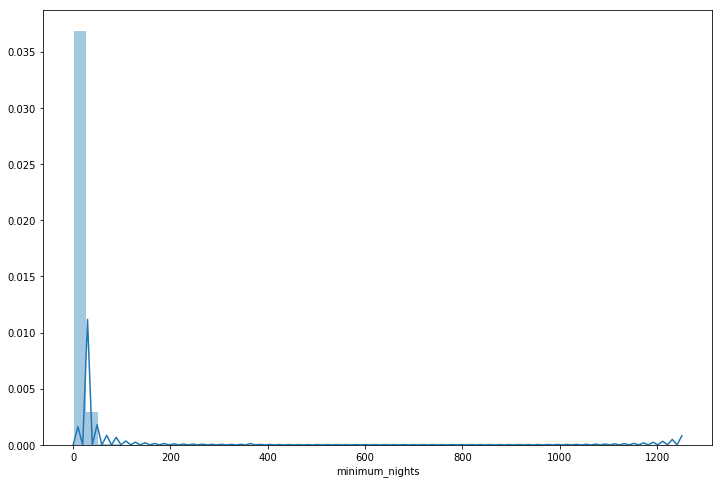

In [51]:
sns.distplot(df_reviews['minimum_nights'])
plt.gcf().set_size_inches(12, 8)

In [52]:
df_nights = df_reviews[df_reviews['minimum_nights']<200]

In [53]:
df_nights.describe()

,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,37899.000000,37899.000000,37899.000000,37899.000000,37899.000000,37899.000000
mean,0.716800,133.343677,5.513655,25.413204,5.237526,112.985884
std,0.269004,98.398182,10.259720,36.677334,26.613346,129.152935
min,0.000000,10.000000,1.000000,1.000000,1.000000,0.000000
25%,0.500000,68.000000,1.000000,3.000000,1.000000,0.000000
50%,0.500000,100.000000,2.000000,9.000000,1.000000,52.000000
75%,1.000000,169.000000,4.000000,31.000000,2.000000,223.000000
max,1.000000,799.000000,198.000000,199.000000,327.000000,365.000000


In [54]:
df_final = df_nights.drop('calculated_host_listings_count',1)

In [55]:
boroughs = list(df_final['neighbourhood_group'].unique())

In [56]:
boroughs

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [57]:
df_final['neighbourhood_group'].replace(boroughs, [1,2,3,4,5], inplace=True)

In [58]:
df_final.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'availability_365'],
      dtype='object')

In [59]:
df_final = df_final[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']]

In [60]:
df_final.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
0,1,1.0,149,1,9
1,2,0.5,225,1,45
4,2,0.5,80,10,9
5,2,0.5,200,3,74
6,1,1.0,60,45,49


In [61]:
y = df_final['price']
X = df_final.drop('price', 1)

In [62]:
from sklearn import linear_model

In [63]:
LR = linear_model.LinearRegression()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size = 0.22)

In [66]:
LR.fit(X_train, y_trian)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
preds = LR.predict(X_test)

In [68]:
preds[:5]

array([160.98153473, 170.11440004,  85.13752062, 169.39761223,
       169.08871414])

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [85]:
mse = mean_squared_error(y_test, preds)

In [86]:
np.sqrt(mse)

87.88192250754446

In [71]:
preds[:10]

array([160.98153473, 170.11440004,  85.13752062, 169.39761223,
       169.08871414, 163.15248228, 167.51305109, 167.62646914,
        83.19565362,  84.97404757])

In [72]:
y_test[:10]

5101     118
25964    135
20020     95
40584    299
9646     120
46280     88
9283     190
12459    105
30795     45
13143     45
Name: price, dtype: int64

In [73]:
mean_absolute_error(y_test, preds)

55.909084032184104

#Random forest 

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
model = DecisionTreeRegressor(max_depth=100, max_leaf_nodes=20, min_samples_leaf=10)

In [111]:
model.fit(X_train, y_trian)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [112]:
predictions = model.predict(X_test)

In [113]:
np.sqrt(mean_squared_error(y_test, predictions))

78.79422280212361

In [114]:
mean_absolute_error(y_test, predictions)

49.0670330485659

C:\Users\manoj praveen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


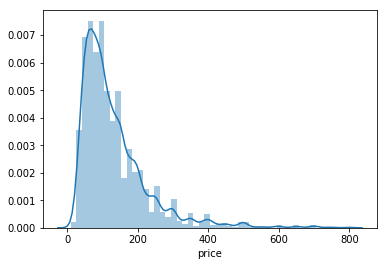

In [116]:
sns.distplot(y_test)

C:\Users\manoj praveen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


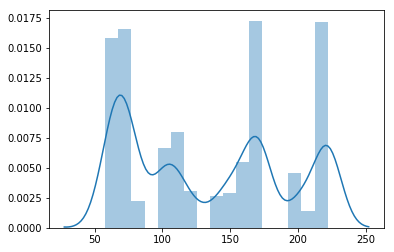

In [117]:
sns.distplot(predictions)